<a href="https://colab.research.google.com/github/printf-bomotayo/Regression_project-House-Price-Prediction-/blob/main/House_price_prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
import os 

Mounted at /content/gdrive


In [ ]:
os.chdir("/content/gdrive/My Drive")

# Importing all the important libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
%matplotlib inline


In [ ]:
df1 = pd.read_csv('kc_house_data.csv')
df1.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Finding missing values.

In [ ]:
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We can conclude that there are no missing values in our dataset.

In [ ]:
df1.shape

(21613, 21)

# Drop useless Columns

In [ ]:
df2 = df1.drop(['id', 'date'], axis =1)
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Check for the Datatype for each feature variable

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

We can conclude that there are string or text datatypes across all the feature variables.

# Rounding of float "bathrooms" variable to integer values.

In [ ]:
df2["bathrooms"]=np.round(df2["bathrooms"])
df2['bathrooms'].head(20)

0     1.0
1     2.0
2     1.0
3     3.0
4     2.0
5     4.0
6     2.0
7     2.0
8     1.0
9     2.0
10    2.0
11    1.0
12    1.0
13    2.0
14    2.0
15    3.0
16    2.0
17    1.0
18    1.0
19    1.0
Name: bathrooms, dtype: float64

# Investigating 'bedrooms' variable for typos

In [ ]:
df2['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

The house with 33 bedrooms is worth exploring further.

In [ ]:
df2[df2['bedrooms'] == 33 ]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,2.0,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


From our observation we can see that it is impossible for a house with 33 bedrooms to have just two bathrooms. Hence 33 bedrooms in this case must have been a typo for 3 bedrooms. Therefore we need to correct the error.

# Fixing the Typo for the 33 bedrooms datapoint.

In [ ]:
df2.loc[15870, 'bedrooms'] = 3
df2.loc[15870, 'bedrooms']

3

In [ ]:
df2['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

# Observe the correlation between each of the feature variable with the Target variable (Price)

In [ ]:
corr_matrix = df2.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.518929
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
zipcode         -0.053168
Name: price, dtype: float64

# Using Heatmap to visulaize the correlation

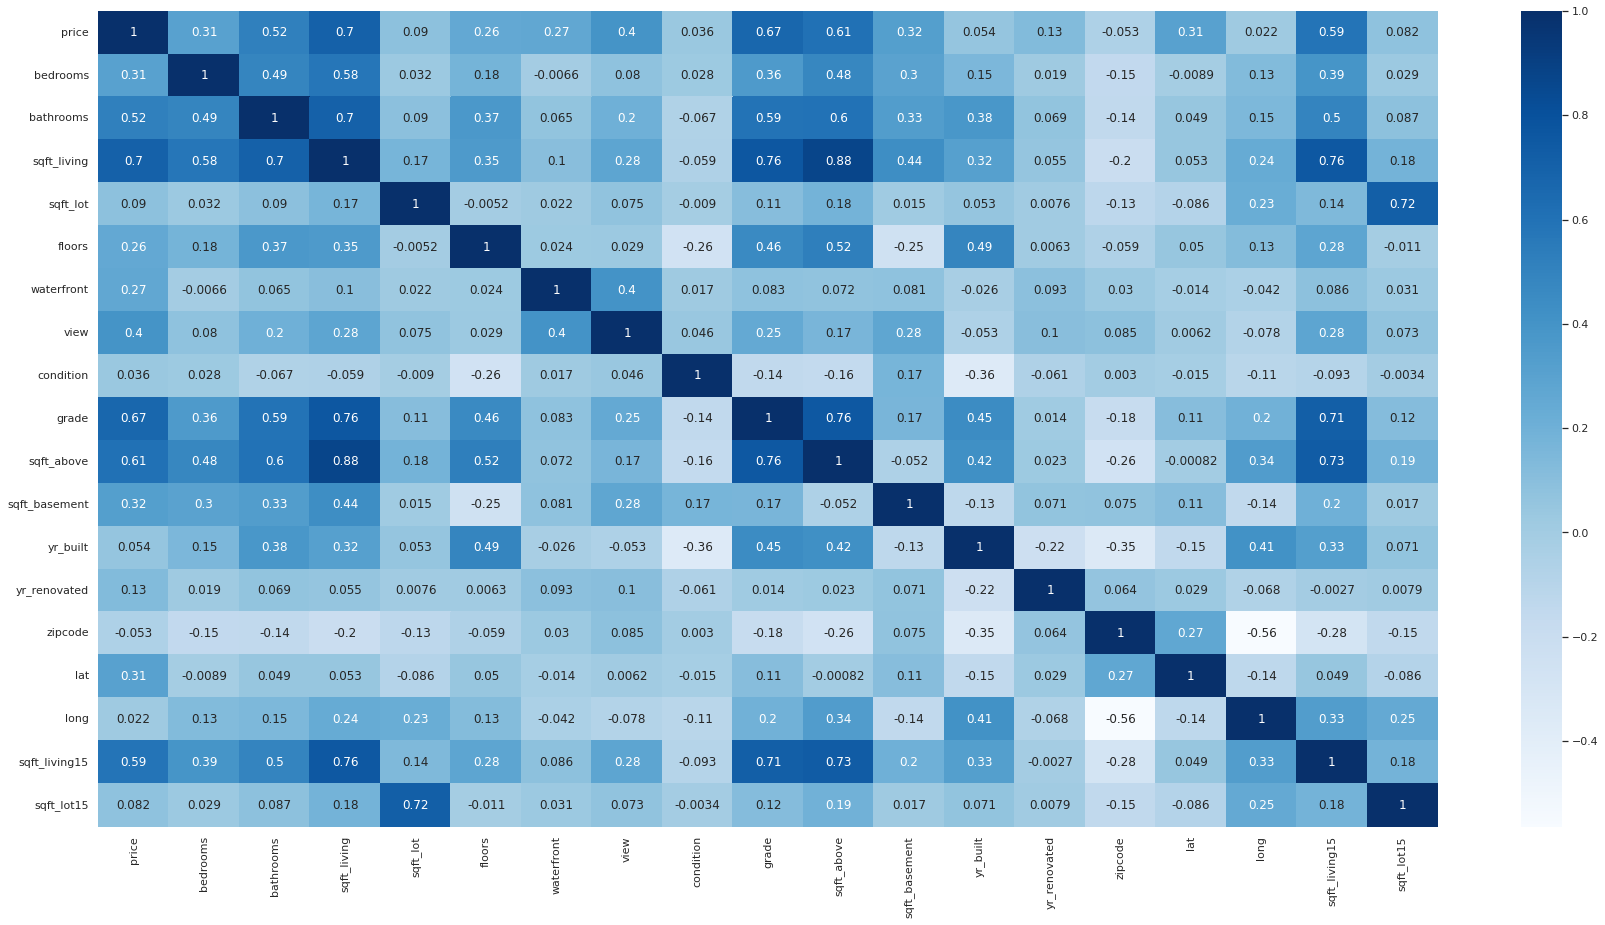

In [ ]:
sns.heatmap(df2.corr(), cmap='Blues', annot=True)
sns.set(rc = {'figure.figsize':(30,15)})
plt.show()

Observations from the Heatmap and correlation figure above:

*   It can be observed that square footage of the living space of a house ("sqft_living variable) is highly positively correlated with the target variable ('Price) with a value of 0.7.
*   Other features such as 'bathrooms', 'grade', 'sqft_above', and 'sqft_living15' seem to have moderate positive correlation with price.

*   Other features which seem to be more correlated with price are 'bedrooms', 'view', 'lat', 'sqft_basement', and 'waterfront'
*   Therefore based on logic, the above highlighted features will be considered  important for the purpose of this analysis, and the other ones which have not been mentioned above will be ignored.




# Dropping some feature variables further based on little or insignificant correlation with the Target (Price).

In [72]:
df3 = df1.drop(['id', 'date', 'sqft_lot', 'sqft_lot15', 'yr_built', 'long'], axis =1)
df3

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,0,98178,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1991,98125,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,0,98028,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,0,98136,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,0,98074,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,3,8,1530,0,0,98103,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,3,8,2310,0,0,98146,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,3,7,1020,0,0,98144,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,3,8,1600,0,0,98027,47.5345,1410


## Splitting Dataset into Train and test sets

In [ ]:
X = df3['sqft_living'].values[:, np.newaxis]
y = df3['price'].values
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [ ]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)



We split our data into train and test set. We chose "sqft_living" as a single input variable for our Linear Regression model because we assessed it to be a good predictor based on its high correlation with our target -"price". We first seperated the feature "sqft_living" from target "price" and then we used sklearn's train_test_split() function. We chose to keep 25% of our data for final testing of our model.

# Applying Linear Regression to the train set

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
predicted = lr.predict(X_test)

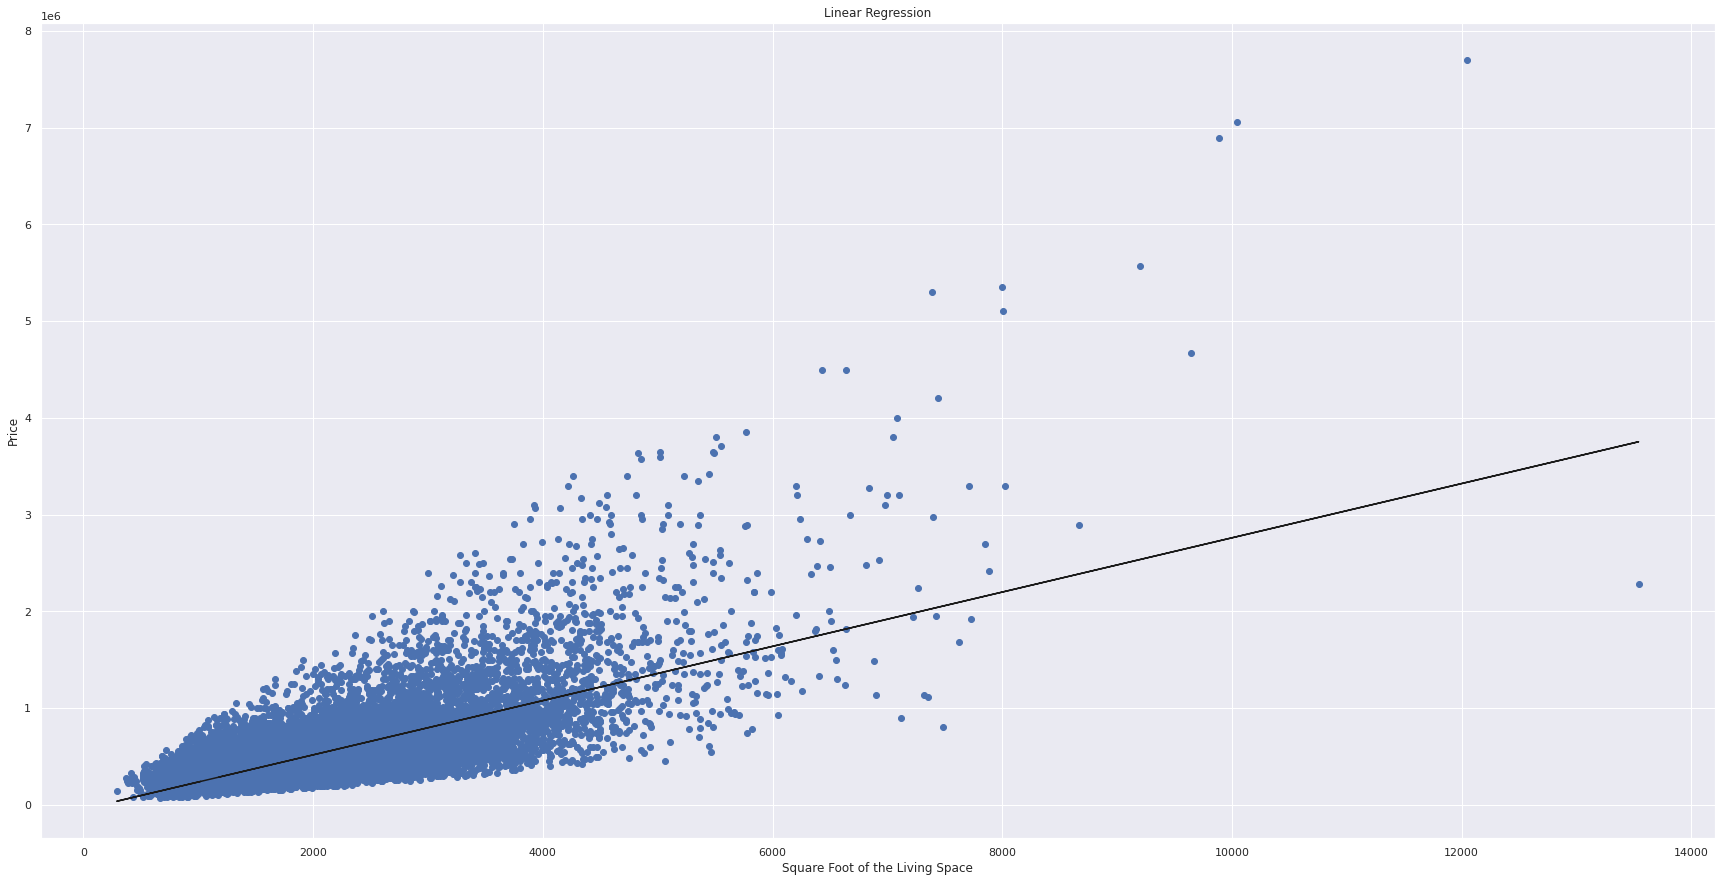

In [ ]:
plt.scatter(X,y,color="b")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Square Foot of the Living Space")
plt.plot(X,lr.predict(X),color="k")
plt.show()

## Assessing the performance of the Linear model

In [ ]:
print('MSE', mean_squared_error(y_test, predicted))
print('R squared', metrics.r2_score(y_test, predicted))

MSE 67460546010.519936
R squared 0.49363796662148296


The R squared metric indicates that nearly 50% of the output variation can be explained by our model's inputs.

# Applying Multi-Linear Regression

In [78]:

X = df3.drop(['price', 'floors', 'condition', 'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15'], axis =1)  #independent columns
X

,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,lat
0,3,1.00,1180,0,0,7,1180,47.5112
1,3,2.25,2570,0,0,7,2170,47.7210
2,2,1.00,770,0,0,6,770,47.7379
3,4,3.00,1960,0,0,7,1050,47.5208
4,3,2.00,1680,0,0,8,1680,47.6168
...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,0,0,8,1530,47.6993
21609,4,2.50,2310,0,0,8,2310,47.5107
21610,2,0.75,1020,0,0,7,1020,47.5944
21611,3,2.50,1600,0,0,8,1600,47.5345


In [79]:
y = df2['price']   #target column i.e price range
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=40) #splitting data with test size of 25%

In [82]:

MLR=LinearRegression() #build linear regression model
MLR.fit(X_train,y_train) #fitting the training data
predicted=MLR.predict(X_test) #testing our model’s performance

In [83]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 43224496275.86533
R squared 0.6605181146530682


Compared to linear regression, our model's accuracy has improved considerably using multi-linear regression.
* The R squared metric increased indicating that nearly 66.28% of the output 
variation can be explained by our model's inputs.

# Applying Polynomial regression 

In [97]:

X = df1[["sqft_living", "grade", "view", "waterfront", "sqft_above", "lat", "zipcode", "condition", "yr_built", "long"]]  #independent columns
y = df1['price']   #target column i.e price range

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=40) #splitting data with test size of 25%

In [99]:
lg = LinearRegression()
poly = PolynomialFeatures(degree=3)

X_train_fit = poly.fit_transform(X_train) #transforming our input data
lg.fit(X_train_fit, y_train)
X_test_ = poly.fit_transform(X_test)
predicted = lg.predict(X_test_)


In [100]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  24643019158.485004
R squared:  0.8064556137063839


Compared to linear regression and multi-linear regression, our model's accuracy has improved considerably using polynomial regression. Our model can now be considered a good one.

*   The R squared metric increased indicating that 81.54% of the output variation can be explained by our model's inputs.


